# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Neeval Kumar
### Preferred Name (if different): Chosen Name
### Student ID: 011877086
### Email address: kumar.neeval@gmail.com
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import plot_confusion_matrix

In [49]:
np.random.seed(42)

#### Code the solution

## Read CSV file

In [50]:
cancer_df = pd.read_csv(r"./homework4_input_data.csv")
cancer_df.head()

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [51]:
Y = np.array((cancer_df["Class"]))
X = cancer_df.drop(columns = ['Class'])
X = X.drop(columns = ["id"])

In [52]:
X.head()

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,SULT1B1,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL
0,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,0.202624,...,4.458889,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923
1,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,0.449673,...,4.322699,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838
2,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,1.624238,...,3.769234,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553
3,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,0.326149,...,4.553598,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830
4,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,1.658433,...,3.937198,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553


## PCA transformation and then plot

In [53]:
colors = {"Breast": '#4287f5',
"Bladder": '#19c5e3', "Colon": '#80d941', "Glioblastoma": '#179933', "Head&Neck": '#f07e78', "Kidney": '#f01e13', 
          "Leukemia": '#f0841f', "LungAdeno": '#db5209', 
          "LungSquamous": '#ce8ced', "Ovarian": '#551075', "Rectal": '#e3d329', "Uterine":'#cc3423'}
project = PCA(n_components=2).fit_transform(X.iloc[0:4336, 1:3000])
project.shape
projected = list(project)
for i in range(len(projected)):
    projected[i] = list(projected[i])
    cancer = Y[i]
    color = colors.get(cancer)
    projected[i].append(color)


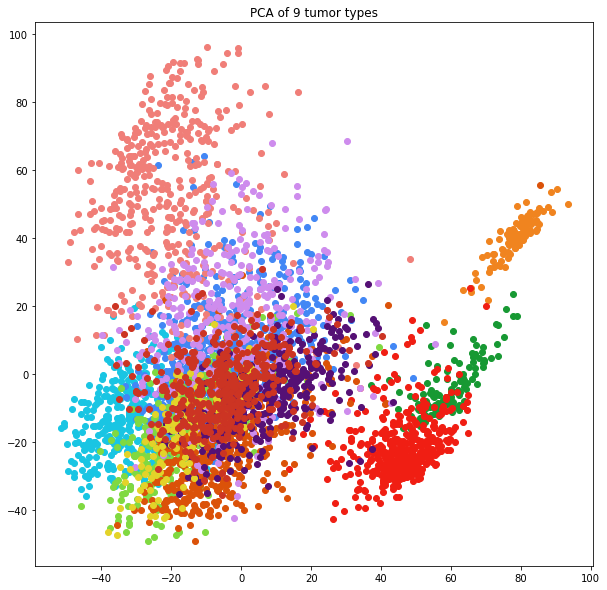

In [54]:

plt.figure(figsize= (10,10))
projected = np.array(projected)


for index in range(len(projected)):
    plt.scatter(float(projected[index,0]), float(projected[index,1]), color = projected[index, 2])

plt.title('PCA of 9 tumor types')
plt.show()


## Scale X and then split with strafication -> Train model

In [55]:

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify = Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468,), (868, 3000), (868,))

In [56]:

model = LinearSVC(multi_class='ovr', class_weight='balanced', max_iter = 2000)
model.fit(X_train,Y_train)
print('Model training finished')


Model training finished


## Cross-Validation scores and then print accuracy of test set onto model

In [57]:
scores = cross_val_score(model, X, Y, cv= 5)
print('Individual cross_validation accuracies:', scores)
print('Mean Cross Validation Accuracy', np.mean(scores))

Individual cross_validation accuracies: [0.97 0.96 0.97 0.96 0.97]
Mean Cross Validation Accuracy 0.9644813143473708


In [58]:
print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on test set: 0.98


## Confusion Matrices

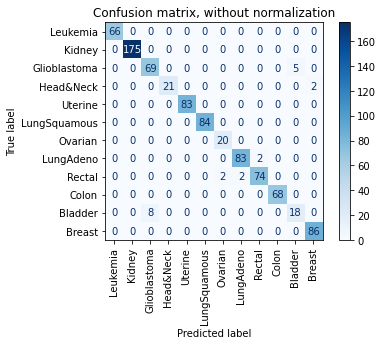

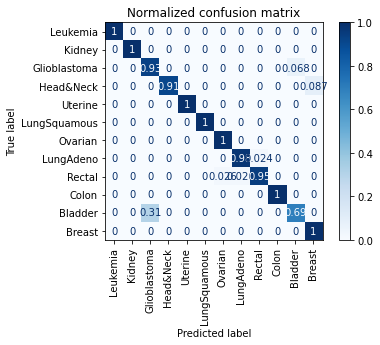

In [59]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=set(Y),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.xticks(rotation = 90)
    disp.ax_.set_title(title)

plt.show()